<a href="https://colab.research.google.com/github/Andrew-Haney/DS-Unit-2-Linear-Models/blob/master/Andrew_Haney_Unit2_Project_Pred_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [149]:
import sys
!pip install category_encoders

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from category_encoders import OneHotEncoder, OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import plot_confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score


cols = ['ID', 'Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'NScore_Neuroticism',
        'EScore_Extraversion', 'OScore_Open_to_Exp', 'AScore_Agreeableness',
        'CScore_Conscientiousness', 'Impulsiveness', 'Sensation_Seeing', 'Alcohol',
        'Amphetamine', 'Amyl', 'Benzos', 'Caffeine', 'Cannabis', 'Chocolate', 'Cocaine',
        'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'Legal_Highs', 'LSD', 'Meth', 
        'Mushrooms', 'Nicotine', 'Semeron', 'VSA']
df = pd.read_csv('/content/drug_consumption.data',
                 header = 0, names= cols, index_col = 'ID',
                 dtype= 'object')

In [150]:
def wrangle(df):
  cutoff = 500
  hcc_cols = [col for col in df.select_dtypes('object').columns
              if df[col].nunique() > cutoff]
  df.drop(columns=hcc_cols, inplace=True)
  single_cols = [col for col in df.select_dtypes('object').columns
              if df[col].nunique() == 1]
  df.drop(columns= single_cols, inplace= True)
  return df

  df = wrangle(df)

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1884 entries, 2 to 1888
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1884 non-null   object
 1   Gender                    1884 non-null   object
 2   Education                 1884 non-null   object
 3   Country                   1884 non-null   object
 4   Ethnicity                 1884 non-null   object
 5   NScore_Neuroticism        1884 non-null   object
 6   EScore_Extraversion       1884 non-null   object
 7   OScore_Open_to_Exp        1884 non-null   object
 8   AScore_Agreeableness      1884 non-null   object
 9   CScore_Conscientiousness  1884 non-null   object
 10  Impulsiveness             1884 non-null   object
 11  Sensation_Seeing          1884 non-null   object
 12  Alcohol                   1884 non-null   object
 13  Amphetamine               1884 non-null   object
 14  Amyl                    

In [152]:
df.head()

,Age,Gender,Education,Country,Ethnicity,NScore_Neuroticism,EScore_Extraversion,OScore_Open_to_Exp,AScore_Agreeableness,CScore_Conscientiousness,Impulsiveness,Sensation_Seeing,Alcohol,Amphetamine,Amyl,Benzos,Caffeine,Cannabis,Chocolate,Cocaine,Crack,Ecstasy,Heroin,Ketamine,Legal_Highs,LSD,Meth,Mushrooms,Nicotine,Semeron,VSA
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,CL5,CL2,CL2,CL0,CL6,CL4,CL6,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,CL6,CL0,CL0,CL0,CL6,CL3,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,CL4,CL0,CL0,CL3,CL5,CL2,CL4,CL2,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,CL4,CL1,CL1,CL0,CL6,CL3,CL6,CL0,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
6,2.59171,0.48246,-1.22751,0.24923,-0.31685,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,CL2,CL0,CL0,CL0,CL6,CL0,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0


In [153]:
df['Age'].nunique()

6

In [154]:
df['Age'] = df['Age'].str.replace('-0.95197', '18-24').str.replace('-0.07854', '25-34').str.replace('0.49788', '35-44').str.replace('1.09449', '45-54').str.replace('1.82213', '55-64').str.replace('2.59171', '65+')
df['Gender'] = df['Gender'].str.replace('-0.48246', 'Female').str.replace('0.48246', 'Male')
df['Cannabis'] = df['Cannabis'].str.replace('CL6', 'Used_24hrs').str.replace('CL5', 'Used_7days').str.replace('CL4', 'Used_Month').str.replace('CL3', 'Used_Year').str.replace('CL2', 'Used_Decade').str.replace('CL1', 'Used_Life').str.replace('CL0', 'Never_Used')
df['Education'] = df['Education'].str.replace('-2.43591', 'Left_before_16').str.replace('-1.73790', 'Left_at_16').str.replace('-1.43719', 'Left_at_17').str.replace('-1.22751', 'Left_at_18').str.replace('-0.61113', 'Some_College').str.replace('-0.05921', 'Professional_Cert').str.replace('0.45468', 'Univ_degree').str.replace('1.16365', 'Masters_Degree').str.replace('1.98437', 'Dr_Degree')
df['Ethnicity'] = df['Ethnicity'].str.replace('-0.50212', 'Asian').str.replace('-1.10702', 'Black').str.replace('1.90725', 'Bl_As').str.replace('0.12600', 'Wh_As').str.replace('-0.22166', 'Wh_Bl').str.replace('0.11440', 'Other').str.replace('-0.31685', 'White')
df['Country'] = df['Country'].str.replace('-0.09765', 'Australia').str.replace('0.24923', 'Canada').str.replace('-0.46841', 'New_Zealand').str.replace('-0.28519', 'Other').str.replace('0.21128', 'Ireland').str.replace('0.96082', 'UK').str.replace('-0.57009', 'USA')
df['Alcohol'] = df['Alcohol'].str.replace('CL6', 'Used_24hrs').str.replace('CL5', 'Used_7days').str.replace('CL4', 'Used_Month').str.replace('CL3', 'Used_Year').str.replace('CL2', 'Used_Decade').str.replace('CL1', 'Used_Life').str.replace('CL0', 'Never_Used')
df['Amphetamine'] = df['Amphetamine'].str.replace('CL6', 'Used_24hrs').str.replace('CL5', 'Used_7days').str.replace('CL4', 'Used_Month').str.replace('CL3', 'Used_Year').str.replace('CL2', 'Used_Decade').str.replace('CL1', 'Used_Life').str.replace('CL0', 'Never_Used')
df['Amyl'] = df['Amyl'].str.replace('CL6', 'Used_24hrs').str.replace('CL5', 'Used_7days').str.replace('CL4', 'Used_Month').str.replace('CL3', 'Used_Year').str.replace('CL2', 'Used_Decade').str.replace('CL1', 'Used_Life').str.replace('CL0', 'Never_Used')
df['Benzos'] = df['Benzos'].str.replace('CL6', 'Used_24hrs').str.replace('CL5', 'Used_7days').str.replace('CL4', 'Used_Month').str.replace('CL3', 'Used_Year').str.replace('CL2', 'Used_Decade').str.replace('CL1', 'Used_Life').str.replace('CL0', 'Never_Used')
df['Caffeine'] = df['Caffeine'].str.replace('CL6', 'Used_24hrs').str.replace('CL5', 'Used_7days').str.replace('CL4', 'Used_Month').str.replace('CL3', 'Used_Year').str.replace('CL2', 'Used_Decade').str.replace('CL1', 'Used_Life').str.replace('CL0', 'Never_Used')
df['Chocolate'] = df['Chocolate'].str.replace('CL6', 'Used_24hrs').str.replace('CL5', 'Used_7days').str.replace('CL4', 'Used_Month').str.replace('CL3', 'Used_Year').str.replace('CL2', 'Used_Decade').str.replace('CL1', 'Used_Life').str.replace('CL0', 'Never_Used')
df['Cocaine'] = df['Cocaine'].str.replace('CL6', 'Used_24hrs').str.replace('CL5', 'Used_7days').str.replace('CL4', 'Used_Month').str.replace('CL3', 'Used_Year').str.replace('CL2', 'Used_Decade').str.replace('CL1', 'Used_Life').str.replace('CL0', 'Never_Used')
df['Crack'] = df['Crack'].str.replace('CL6', 'Used_24hrs').str.replace('CL5', 'Used_7days').str.replace('CL4', 'Used_Month').str.replace('CL3', 'Used_Year').str.replace('CL2', 'Used_Decade').str.replace('CL1', 'Used_Life').str.replace('CL0', 'Never_Used')
df['Ecstasy'] = df['Ecstasy'].str.replace('CL6', 'Used_24hrs').str.replace('CL5', 'Used_7days').str.replace('CL4', 'Used_Month').str.replace('CL3', 'Used_Year').str.replace('CL2', 'Used_Decade').str.replace('CL1', 'Used_Life').str.replace('CL0', 'Never_Used')
df['Heroin'] = df['Heroin'].str.replace('CL6', 'Used_24hrs').str.replace('CL5', 'Used_7days').str.replace('CL4', 'Used_Month').str.replace('CL3', 'Used_Year').str.replace('CL2', 'Used_Decade').str.replace('CL1', 'Used_Life').str.replace('CL0', 'Never_Used')
df['Ketamine'] = df['Ketamine'].str.replace('CL6', 'Used_24hrs').str.replace('CL5', 'Used_7days').str.replace('CL4', 'Used_Month').str.replace('CL3', 'Used_Year').str.replace('CL2', 'Used_Decade').str.replace('CL1', 'Used_Life').str.replace('CL0', 'Never_Used')
df['Legal_Highs'] = df['Legal_Highs'].str.replace('CL6', 'Used_24hrs').str.replace('CL5', 'Used_7days').str.replace('CL4', 'Used_Month').str.replace('CL3', 'Used_Year').str.replace('CL2', 'Used_Decade').str.replace('CL1', 'Used_Life').str.replace('CL0', 'Never_Used')
df['LSD'] = df['LSD'].str.replace('CL6', 'Used_24hrs').str.replace('CL5', 'Used_7days').str.replace('CL4', 'Used_Month').str.replace('CL3', 'Used_Year').str.replace('CL2', 'Used_Decade').str.replace('CL1', 'Used_Life').str.replace('CL0', 'Never_Used')
df['Meth'] = df['Meth'].str.replace('CL6', 'Used_24hrs').str.replace('CL5', 'Used_7days').str.replace('CL4', 'Used_Month').str.replace('CL3', 'Used_Year').str.replace('CL2', 'Used_Decade').str.replace('CL1', 'Used_Life').str.replace('CL0', 'Never_Used')
df['Mushrooms'] = df['Mushrooms'].str.replace('CL6', 'Used_24hrs').str.replace('CL5', 'Used_7days').str.replace('CL4', 'Used_Month').str.replace('CL3', 'Used_Year').str.replace('CL2', 'Used_Decade').str.replace('CL1', 'Used_Life').str.replace('CL0', 'Never_Used')
df['Nicotine'] = df['Nicotine'].str.replace('CL6', 'Used_24hrs').str.replace('CL5', 'Used_7days').str.replace('CL4', 'Used_Month').str.replace('CL3', 'Used_Year').str.replace('CL2', 'Used_Decade').str.replace('CL1', 'Used_Life').str.replace('CL0', 'Never_Used')
df['Semeron'] = df['Semeron'].str.replace('CL6', 'Used_24hrs').str.replace('CL5', 'Used_7days').str.replace('CL4', 'Used_Month').str.replace('CL3', 'Used_Year').str.replace('CL2', 'Used_Decade').str.replace('CL1', 'Used_Life').str.replace('CL0', 'Never_Used')
df['VSA'] = df['VSA'].str.replace('CL6', 'Used_24hrs').str.replace('CL5', 'Used_7days').str.replace('CL4', 'Used_Month').str.replace('CL3', 'Used_Year').str.replace('CL2', 'Used_Decade').str.replace('CL1', 'Used_Life').str.replace('CL0', 'Never_Used')

In [155]:
df['NScore_Neuroticism'] = df['NScore_Neuroticism'].astype(float)
df['EScore_Extraversion'] = df['EScore_Extraversion'].astype(float)
df['OScore_Open_to_Exp'] = df['OScore_Open_to_Exp'].astype(float)
df['AScore_Agreeableness'] = df['AScore_Agreeableness'].astype(float)
df['CScore_Conscientiousness'] = df['CScore_Conscientiousness'].astype(float)
df['Impulsiveness'] = df['Impulsiveness'].astype(float)
df['Sensation_Seeing'] = df['Sensation_Seeing'].astype(float)

In [156]:
df['Age'].value_counts(normalize= True)

18-24    0.341295
25-34    0.255308
35-44    0.188429
45-54    0.156051
55-64    0.049363
65+      0.009554
Name: Age, dtype: float64

In [157]:
df['OScore_Open_to_Exp'].value_counts()

-0.01928    134
 0.29338    116
 0.14143    107
-0.17779    103
-0.31776    101
 0.44585     98
 0.88309     87
 0.72330     87
-0.45174     86
-0.58331     86
 0.58331     83
 1.06238     81
-0.71727     76
-0.84732     68
-1.11902     64
 1.43533     63
-0.97631     60
 1.24033     57
-1.27553     51
-1.42424     39
 1.65653     38
 1.88511     34
-1.55521     26
-1.68062     25
-1.82919     23
 2.15324     19
-1.97495     13
 2.44904     13
-2.39883     11
-2.21069      9
-2.09015      9
 2.90161      7
-2.85950      4
-2.63199      4
-3.27393      2
Name: OScore_Open_to_Exp, dtype: int64

In [158]:
df.head()

,Age,Gender,Education,Country,Ethnicity,NScore_Neuroticism,EScore_Extraversion,OScore_Open_to_Exp,AScore_Agreeableness,CScore_Conscientiousness,Impulsiveness,Sensation_Seeing,Alcohol,Amphetamine,Amyl,Benzos,Caffeine,Cannabis,Chocolate,Cocaine,Crack,Ecstasy,Heroin,Ketamine,Legal_Highs,LSD,Meth,Mushrooms,Nicotine,Semeron,VSA
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,25-34,Female,Dr_Degree,UK,White,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,Used_7days,Used_Decade,Used_Decade,Never_Used,Used_24hrs,Used_Month,Used_24hrs,Used_Year,Never_Used,Used_Month,Never_Used,Used_Decade,Never_Used,Used_Decade,Used_Year,Never_Used,Used_Month,Never_Used,Never_Used
3,35-44,Female,Professional_Cert,UK,White,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,Used_24hrs,Never_Used,Never_Used,Never_Used,Used_24hrs,Used_Year,Used_Month,Never_Used,Never_Used,Never_Used,Never_Used,Never_Used,Never_Used,Never_Used,Never_Used,Used_Life,Never_Used,Never_Used,Never_Used
4,18-24,Male,Masters_Degree,UK,White,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,Used_Month,Never_Used,Never_Used,Used_Year,Used_7days,Used_Decade,Used_Month,Used_Decade,Never_Used,Never_Used,Never_Used,Used_Decade,Never_Used,Never_Used,Never_Used,Never_Used,Used_Decade,Never_Used,Never_Used
5,35-44,Male,Dr_Degree,UK,White,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,Used_Month,Used_Life,Used_Life,Never_Used,Used_24hrs,Used_Year,Used_24hrs,Never_Used,Never_Used,Used_Life,Never_Used,Never_Used,Used_Life,Never_Used,Never_Used,Used_Decade,Used_Decade,Never_Used,Never_Used
6,65+,Male,Left_at_18,Canada,White,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,Used_Decade,Never_Used,Never_Used,Never_Used,Used_24hrs,Never_Used,Used_Month,Never_Used,Never_Used,Never_Used,Never_Used,Never_Used,Never_Used,Never_Used,Never_Used,Never_Used,Used_24hrs,Never_Used,Never_Used


In [159]:
# df['Alcohol'].value_counts().index.str.replace('Used_Year', 'np.nan').str.replace('Used_Decade', 'np.nan').str.replace('Used_life', 'np.nan').str.replace('Never_Used', 'np.nan')


In [160]:
target = 'Meth'
X = df.drop(columns= target)
y = df[target]

In [161]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size= 0.2, random_state= 42)


In [162]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(1507, 30)
(1507,)
(377, 30)
(377,)


In [163]:
from sklearn.model_selection import GridSearchCV 

In [164]:
model_rf = make_pipeline(OrdinalEncoder(),
                         SimpleImputer(),
                         RandomForestClassifier(max_depth= 10, n_jobs= -1))

model_rf.fit(X_train, y_train)
print('Validation Score: ', model_rf.score(X_val, y_val))

Validation Score:  0.7718832891246684


In [165]:
print('Baseline accuracy ', y_train.value_counts(normalize= True).max())

Baseline accuracy  0.7551426675514267


In [166]:
df_numerical = df.select_dtypes(exclude= 'object')
df_numerical.head()

,NScore_Neuroticism,EScore_Extraversion,OScore_Open_to_Exp,AScore_Agreeableness,CScore_Conscientiousness,Impulsiveness,Sensation_Seeing
ID,,,,,,,
2,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575
3,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148
4,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084
5,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575
6,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858


In [167]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import GridSearchCV

# model_rscv = make_pipeline(StandardScaler(),
#                          OrdinalEncoder(),
#                          GridSearchCV(estimator= 'logisticregression', n_jobs= -1))

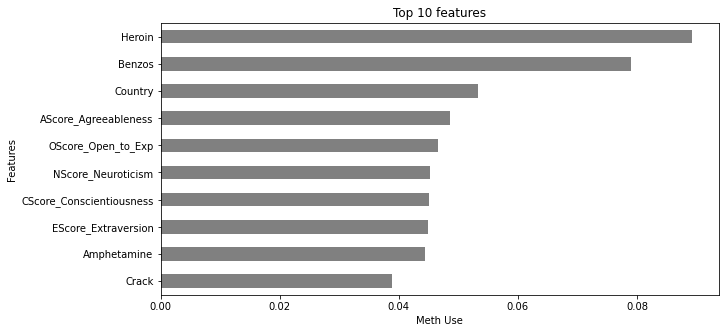

In [168]:
rf = model_rf.named_steps['randomforestclassifier']
importances = pd.Series(rf.feature_importances_, X_train.columns)

n = 10
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh(color='grey')
plt.xlabel('Meth Use')
plt.ylabel('Features');

In [169]:
from xgboost import XGBClassifier

model_boost = make_pipeline(OrdinalEncoder(),
                            SimpleImputer(strategy= 'median'),
                            XGBClassifier(n_estimators= 75, learning_rate= 0.2,
                                          random_state= 42))
model_boost.fit(X_train, y_train);

In [170]:
model_boost.score(X_val, y_val)

0.7798408488063661

In [171]:
df_cat = df.select_dtypes(exclude= 'number')

In [172]:
# df_cat['Education'].value_counts(normalize= True).index
df_cat.head()

,Age,Gender,Education,Country,Ethnicity,Alcohol,Amphetamine,Amyl,Benzos,Caffeine,Cannabis,Chocolate,Cocaine,Crack,Ecstasy,Heroin,Ketamine,Legal_Highs,LSD,Meth,Mushrooms,Nicotine,Semeron,VSA
ID,,,,,,,,,,,,,,,,,,,,,,,,
2,25-34,Female,Dr_Degree,UK,White,Used_7days,Used_Decade,Used_Decade,Never_Used,Used_24hrs,Used_Month,Used_24hrs,Used_Year,Never_Used,Used_Month,Never_Used,Used_Decade,Never_Used,Used_Decade,Used_Year,Never_Used,Used_Month,Never_Used,Never_Used
3,35-44,Female,Professional_Cert,UK,White,Used_24hrs,Never_Used,Never_Used,Never_Used,Used_24hrs,Used_Year,Used_Month,Never_Used,Never_Used,Never_Used,Never_Used,Never_Used,Never_Used,Never_Used,Never_Used,Used_Life,Never_Used,Never_Used,Never_Used
4,18-24,Male,Masters_Degree,UK,White,Used_Month,Never_Used,Never_Used,Used_Year,Used_7days,Used_Decade,Used_Month,Used_Decade,Never_Used,Never_Used,Never_Used,Used_Decade,Never_Used,Never_Used,Never_Used,Never_Used,Used_Decade,Never_Used,Never_Used
5,35-44,Male,Dr_Degree,UK,White,Used_Month,Used_Life,Used_Life,Never_Used,Used_24hrs,Used_Year,Used_24hrs,Never_Used,Never_Used,Used_Life,Never_Used,Never_Used,Used_Life,Never_Used,Never_Used,Used_Decade,Used_Decade,Never_Used,Never_Used
6,65+,Male,Left_at_18,Canada,White,Used_Decade,Never_Used,Never_Used,Never_Used,Used_24hrs,Never_Used,Used_Month,Never_Used,Never_Used,Never_Used,Never_Used,Never_Used,Never_Used,Never_Used,Never_Used,Never_Used,Used_24hrs,Never_Used,Never_Used


In [173]:
target= 'Amphetamine'
X2 = df_cat.drop(columns= target)
y2 = df_cat[target]

X2_train, X2_val, y2_train, y2_val = train_test_split(X2, y2, test_size= 0.3, 
                                                      random_state= 42)

In [174]:
model_boost_cat = make_pipeline(OrdinalEncoder(),
                            SimpleImputer(strategy= 'median'),
                            XGBClassifier(n_estimators= 75, learning_rate= 0.4,
                                          random_state= 42))
model_boost_cat.fit(X2_train, y2_train);

In [175]:
model_boost_cat.get_params()

{'memory': None,
 'ordinalencoder': OrdinalEncoder(cols=['Age', 'Gender', 'Education', 'Country', 'Ethnicity',
                      'Alcohol', 'Amyl', 'Benzos', 'Caffeine', 'Cannabis',
                      'Chocolate', 'Cocaine', 'Crack', 'Ecstasy', 'Heroin',
                      'Ketamine', 'Legal_Highs', 'LSD', 'Meth', 'Mushrooms',
                      'Nicotine', 'Semeron', 'VSA'],
                drop_invariant=False, handle_missing='value',
                handle_unknown='value',
                mapping=[{'col': 'Age', 'data_type': dtyp...
 Used_Decade    4
 Used_7days     5
 Used_Life      6
 Used_Month     7
 NaN           -2
 dtype: int64},
                         {'col': 'Semeron', 'data_type': dtype('O'),
                          'mapping': Never_Used     1
 Used_Month     2
 Used_Year      3
 Used_Decade    4
 Used_Life      5
 NaN           -2
 dtype: int64},
                         {'col': 'VSA', 'data_type': dtype('O'),
                          'mapping': Used_Dec

In [176]:
baseline_acc2 = y2_train.value_counts(normalize= True).max()
print('Baseline Accuracy 2 ', baseline_acc2)

Baseline Accuracy 2  0.5098634294385432


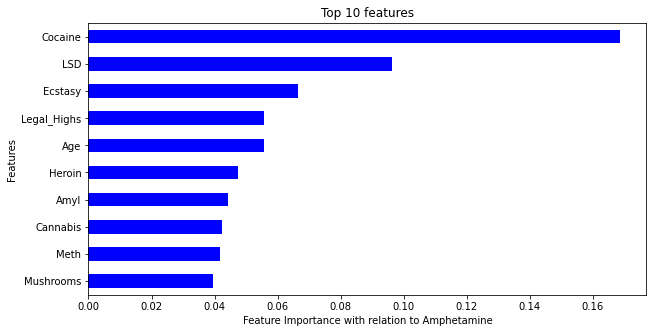

In [177]:
boost_cat = model_boost_cat.named_steps['xgbclassifier']
importances_cat = pd.Series(boost_cat.feature_importances_, X2_val.columns)

n = 10
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances_cat.sort_values()[-n:].plot.barh(color= 'blue')
plt.xlabel('Feature Importance with relation to Amphetamine')
plt.ylabel('Features');

In [178]:
df_numerical.shape

(1884, 7)

In [179]:
heroin = df_cat['Heroin']
cannabis = df_cat['Cannabis']
meth = df_cat['Meth']
alcohol = df_cat['Alcohol']
age_group = df_cat['Age']
O_score = df_numerical['OScore_Open_to_Exp']
C_score = df_numerical['CScore_Conscientiousness']
E_score = df_numerical['EScore_Extraversion']
A_score = df_numerical['AScore_Agreeableness']
N_score = df_numerical['NScore_Neuroticism']
impulsiveness = df_numerical['Impulsiveness']
sen_seeing = df_numerical['Sensation_Seeing']


In [203]:
import seaborn as sns

sns.catplot(x= N_score, y= alcohol);

TypeError: ignored

##### **O-Score(Openness)** is a person's willingness to be open to new ideas and experiences.  Scoring is again, very similar to the the E-Score in the sense that a higher positive score indicates you are more likely to experiment with various substances.

##### **C-Score(Conscientiousness)** shows organization vs chaos. At the highest end of the scale, perfectionism and OCD are prevalent.  On the lowest end of the scale would be those who act before thinking and spontaneous individuals. 

##### **E-Score(Extraversion)** in this scenario uses 0 as a start point and a positive score indicating you are more extroverted while a negative score indicates a personality that is more introverted.

##### **A-Score(Agreeableness)** is how agreeable or prone to persuasion an individual is. Someone with a higher score is more likely to be a people pleaser, while someone with a low score is more likely to be invested in personal interests.

##### **N-Score(Neuroticism)** is scored on a scale of 0-12. A score of 0-6 means there is a general lack of Neuroticism present and 6-12 indicates a positive result for Neuroticism.  In this case, we will be using a scale from 0.0 to 1.2 with 0.6 being the cutoff.


In [ ]:
clr = classification_report(y2_val, model_boost_cat.predict(X2_val))

In [ ]:
print(clr)